In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
# Read the CSV file
df = pd.read_csv('/content/mental_health.csv')
ds = pd.read_csv('/content/translated_intents.csv')
# Display the DataFrame
df['tag'] = df['tag'].astype('object')
print(df)



        tag                                           patterns  \
0   1590140              Apa artinya memiliki penyakit mental?   
1   2110618           Siapa yang mempengaruhi penyakit mental?   
2   6361820              Apa yang menyebabkan penyakit mental?   
3   9434130  Apa saja tanda -tanda peringatan penyakit mental?   
4   7657263        Bisakah orang dengan penyakit mental pulih?   
..      ...                                                ...   
93  4373204  Bagaimana saya tahu jika saya minum terlalu ba...   
94  7807643  Jika ganja berbahaya, mengapa kita melegalkannya?   
95  4352464  Bagaimana saya bisa meyakinkan anak -anak saya...   
96  6521784           Apa status hukum (dan bukti) minyak CBD?   
97  3221856                          Apa bukti tentang vaping?   

                                            responses  
0   Penyakit mental adalah kondisi kesehatan yang ...  
1   Diperkirakan bahwa penyakit mental mempengaruh...  
2   Diperkirakan bahwa penyakit mental 

In [ ]:
df.info()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        98 non-null     object
 1   patterns   98 non-null     object
 2   responses  98 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        80 non-null     object
 1   patterns   80 non-null     object
 2   responses  80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [ ]:
# there are null values on FullText, drop it

df = df.dropna()
ds = ds.dropna()
df.info()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        98 non-null     int64 
 1   patterns   98 non-null     object
 2   responses  98 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        80 non-null     object
 1   patterns   80 non-null     object
 2   responses  80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [ ]:


# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus '\n', '\r', dan '\t'
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

    # Menghapus penggunaan ganda dari '='
    text = re.sub(r'=+', '=', text)

    # Menghapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Menghapus spasi ganda
    text = re.sub(r'\s+', ' ', text)

    # Menghapus spasi di awal dan akhir
    text = text.strip()

    return text

# Terapkan fungsi pada kolom yang diinginkan

df['patterns'] = df['patterns'].apply(clean_text)
df['responses'] = df['responses'].apply(clean_text)
ds['patterns'] = ds['patterns'].apply(clean_text)
ds['responses'] = ds['responses'].apply(clean_text)
# Menampilkan DataFrame yang telah dibersihkan
print(df)


        tag                                           patterns  \
0   1590140              Apa artinya memiliki penyakit mental?   
1   2110618           Siapa yang mempengaruhi penyakit mental?   
2   6361820              Apa yang menyebabkan penyakit mental?   
3   9434130  Apa saja tanda -tanda peringatan penyakit mental?   
4   7657263        Bisakah orang dengan penyakit mental pulih?   
..      ...                                                ...   
93  4373204  Bagaimana saya tahu jika saya minum terlalu ba...   
94  7807643  Jika ganja berbahaya, mengapa kita melegalkannya?   
95  4352464  Bagaimana saya bisa meyakinkan anak -anak saya...   
96  6521784           Apa status hukum (dan bukti) minyak CBD?   
97  3221856                          Apa bukti tentang vaping?   

                                            responses  
0   Penyakit mental adalah kondisi kesehatan yang ...  
1   Diperkirakan bahwa penyakit mental mempengaruh...  
2   Diperkirakan bahwa penyakit mental 

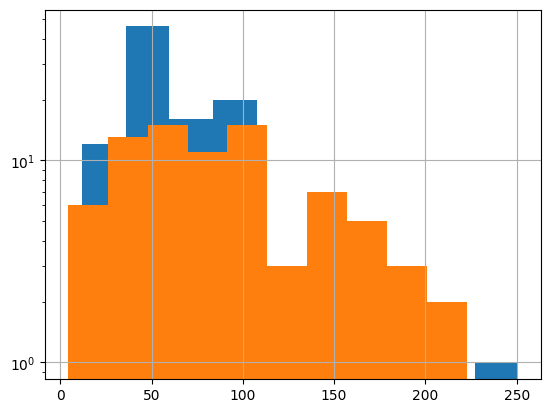

In [ ]:
df['patterns'].str.len().hist().set_yscale('log')
ds['patterns'].str.len().hist().set_yscale('log')

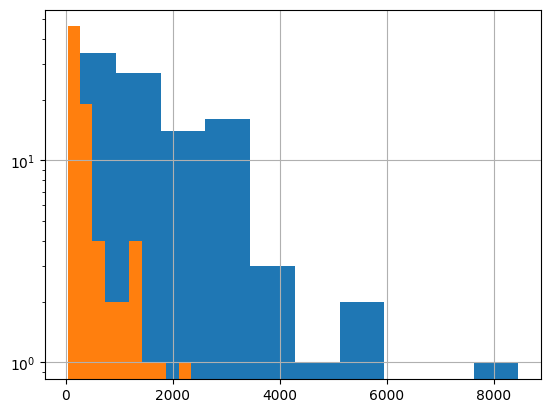

In [ ]:
df['responses'].str.len().hist().set_yscale('log')
ds['responses'].str.len().hist().set_yscale('log')

In [ ]:
df.to_csv('/content/mental_health_cleaned.csv', index=False)
ds.to_csv('/content/mental_instents_cleaned.csv', index=False)